# Repo Market Analysis

## Imports

In [42]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

API_KEY = '5a50326f6d5a0a4761993872596a4d76'

## Indicators

In [43]:
# Economic indicators for fixed income market analysis
economic_indicators = [
    ("SOFR", "Secured Overnight Financing Rate (SOFR)", "Reference rate that measures the cost of borrowing cash overnight collateralized by Treasury securities."),
    ("SP500", "S&P 500 Index", "Benchmark stock market index reflecting investor sentiment."),
    ("TEDRATE", "TED Spread", "Difference between interbank lending rates and Treasury bill rates, indicating credit risk perceptions."),
    ("VIXCLS", "Volatility Index (VIX)", "Measures market volatility and investor sentiment."),
    ("FEDFUNDS", "Federal Funds Rate", "Short-term interest rate controlled by the Federal Reserve."),
    ("T10Y2Y", "10y/2y Constant Maturity Spread", "Yield curve indicator showing the difference between long-term and short-term Treasury yields."),
    ("BAA10Y", "Baa Corporate Bond Yield", "Yield on corporate bonds with Baa credit rating."),
    ("UMCSENT", "Consumer Sentiment Index", "Measures consumer sentiment and confidence."),
    ("CPALTT01USM661S", "Corporate Bond Yield Spread", "Spread between corporate bond yields and 10-year Treasury yields.")
    # Add more indicators as needed
]

## Analysis

Repo Trading Research and Visualization



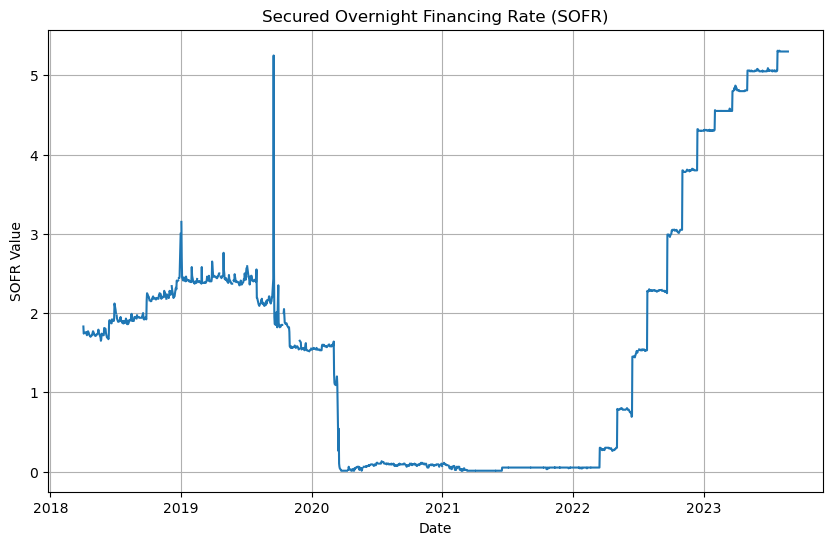


Secured Overnight Financing Rate (SOFR) Data:
Reference rate that measures the cost of borrowing cash overnight collateralized by Treasury securities.

Summary:

            - SOFR is a reference rate for overnight borrowing secured by Treasury securities.
            - Impact on short-term funding costs and liquidity in the repo market.
            - Alternative to LIBOR and potential implications for market participants.
            - Reflects demand and supply dynamics in the money markets.


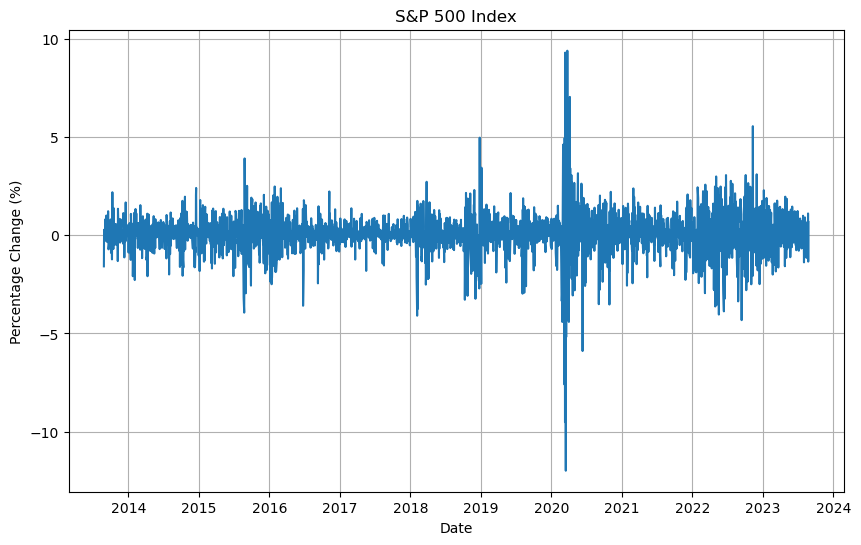


S&P 500 Index Data:
Benchmark stock market index reflecting investor sentiment.

Summary:

            - Increased demand for risky assets, potentially reducing demand for safe-haven assets like Treasuries.
            - Reduced demand for repo transactions due to investors allocating funds to equities.
            - Lower repo rates due to reduced demand for borrowing cash.
            - Impact on liquidity and shift in funding preferences.
            - Regulatory implications and potential oversight.


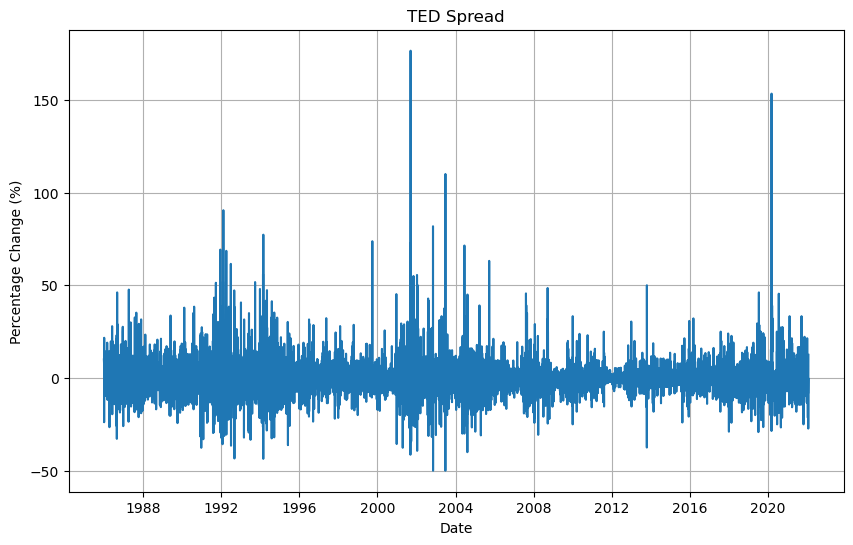


TED Spread Data:
Difference between interbank lending rates and Treasury bill rates, indicating credit risk perceptions.

Summary:

            - High TED Spread suggests credit risk and can lead to tightened liquidity.
            - Higher repo rates due to increased interbank lending costs.
            - Reduced confidence and impact on repo participation.
            - Indication of market stress and systemic risk.


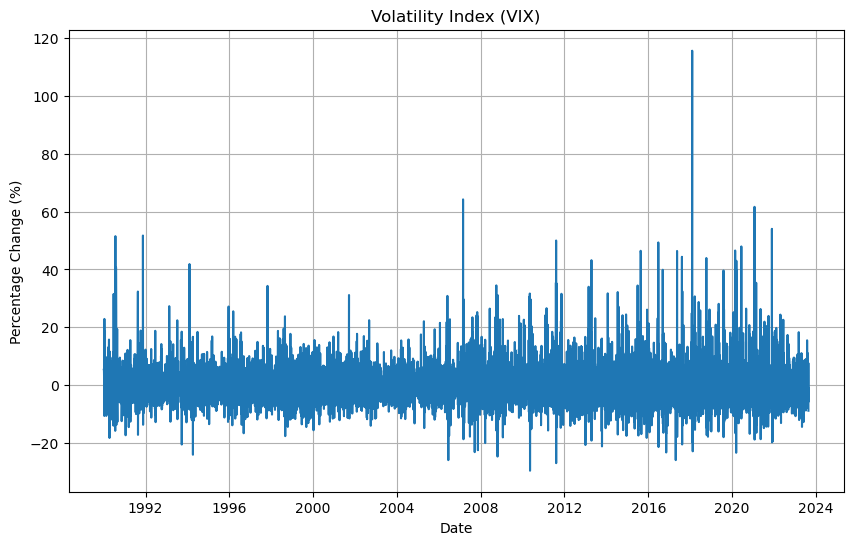


Volatility Index (VIX) Data:
Measures market volatility and investor sentiment.

Summary:

            - High VIX suggests uncertainty and can lead to tightened liquidity.
            - Increased repo rates due to higher uncertainty.
            - Higher margin requirements and reduced market activity.
            - Flight to quality and demand for safe-haven assets.


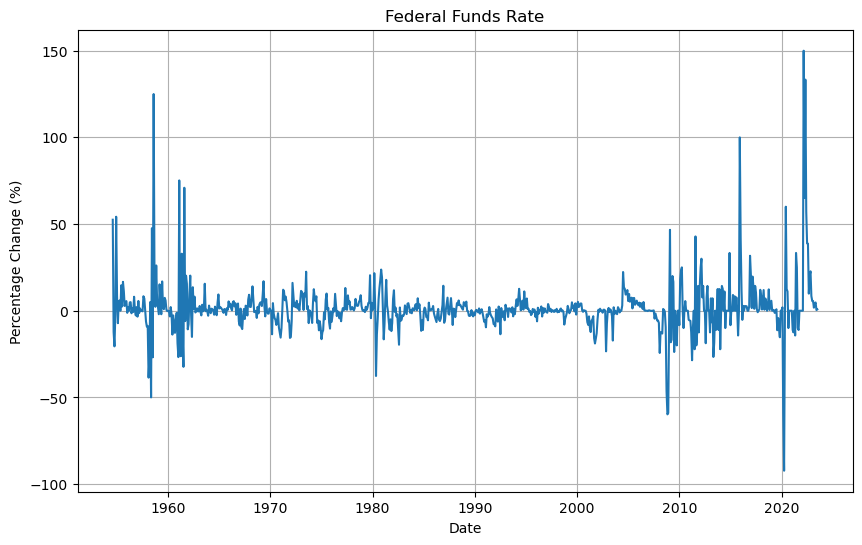


Federal Funds Rate Data:
Short-term interest rate controlled by the Federal Reserve.

Summary:

            - High federal funds rate increases borrowing costs for banks.
            - Higher borrowing costs in repo market.
            - Tightened liquidity and shift in funding strategies.


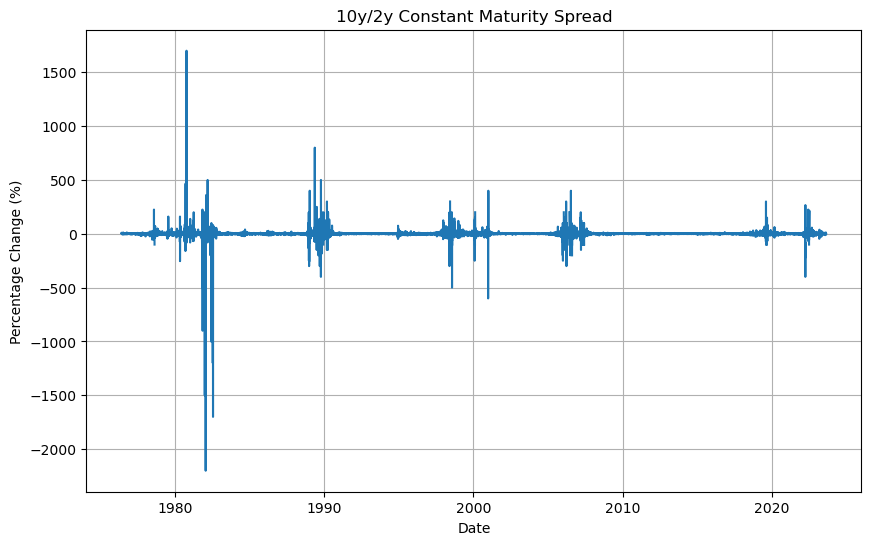


10y/2y Constant Maturity Spread Data:
Yield curve indicator showing the difference between long-term and short-term Treasury yields.

Summary:

            - Indicates economic growth expectations.
            - Impact on borrowing costs and liquidity.
            - Yield curve strategies and potential monetary policy effects.


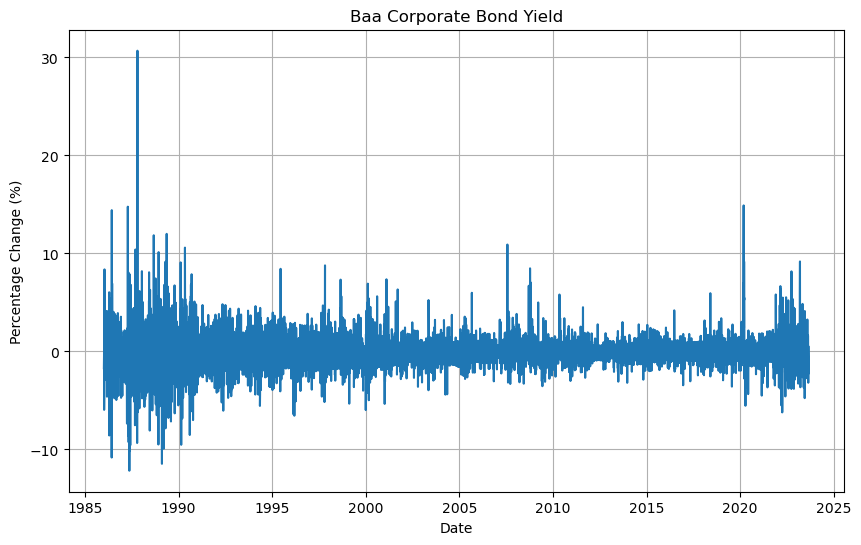


Baa Corporate Bond Yield Data:
Yield on corporate bonds with Baa credit rating.

Summary:

            - Indicates higher corporate borrowing costs.
            - Potential impact on repo borrowing and lending.
            - Increased demand for safe assets.


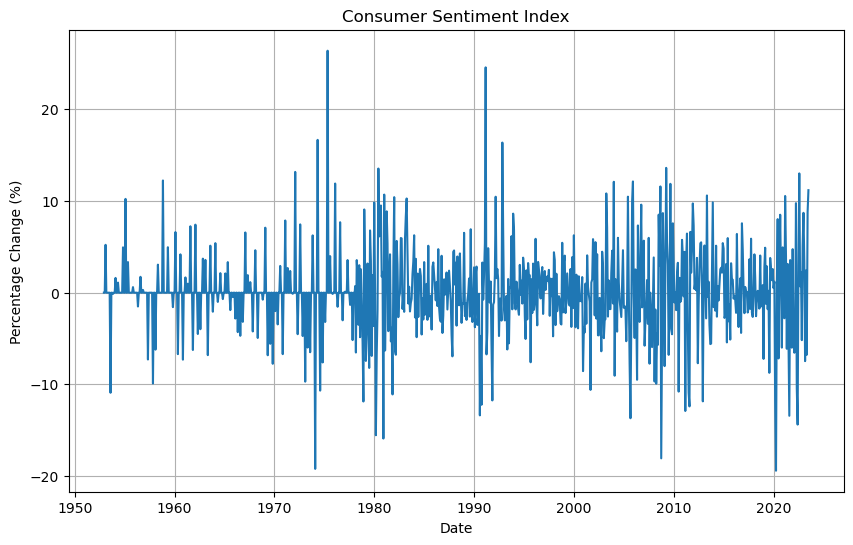


Consumer Sentiment Index Data:
Measures consumer sentiment and confidence.

Summary:

            - Increased economic activity and borrowing appetite.
            - Strengthened liquidity and risk-taking.


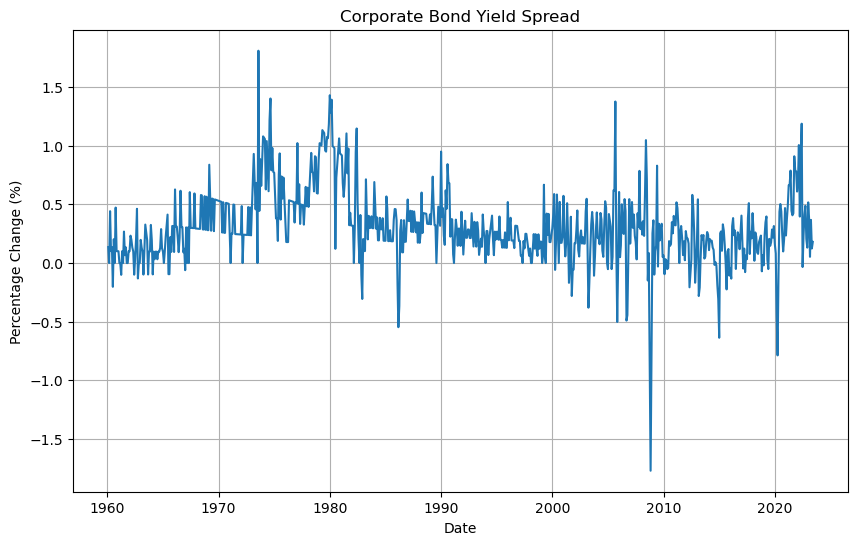


Corporate Bond Yield Spread Data:
Spread between corporate bond yields and 10-year Treasury yields.

Summary:

            - Indicates credit risk concerns and reduced liquidity.
            - Impact on collateral, risk management, and safe assets.


In [44]:
# Fetch and display economic indicators using FRED API
def fetch_economic_indicators():
    for indicator_id, indicator_name, indicator_description in economic_indicators:
        url = f"https://api.stlouisfed.org/fred/series/observations"
        params = {
            "series_id": indicator_id,
            "api_key": API_KEY,
            "file_type": "json"
        }

        response = requests.get(url, params=params)
        data = response.json()

        if "observations" in data:
            observations = data["observations"]
            df = pd.DataFrame(observations)
            df["date"] = pd.to_datetime(df["date"])
            df.set_index("date", inplace=True)
            
            # Convert value column to numeric (ignore errors)
            df['value'] = pd.to_numeric(df['value'], errors='coerce')
            
            # Generate visualization using matplotlib
            plt.figure(figsize=(10, 6))
            
            # Plot SOFR data in outright terms
            if "SOFR" in indicator_id:
                plt.plot(df.index, df['value'])
                plt.title(f"{indicator_name}")
                plt.xlabel("Date")
                plt.ylabel("SOFR Value")
                plt.grid()
            else:
                # Calculate percentage change
                df['percentage_change'] = df['value'].pct_change() * 100
                plt.plot(df.index, df['percentage_change'])
                plt.title(f"{indicator_name}")
                plt.xlabel("Date")
                plt.ylabel("Percentage Change (%)")
                plt.grid()
            
            # Description paragraph
            description = ""
            if "SOFR" in indicator_id:
                description = """
            - SOFR is a reference rate for overnight borrowing secured by Treasury securities.
            - Impact on short-term funding costs and liquidity in the repo market.
            - Alternative to LIBOR and potential implications for market participants.
            - Reflects demand and supply dynamics in the money markets."""
            elif "SP500" in indicator_id:
                description = """
            - Increased demand for risky assets, potentially reducing demand for safe-haven assets like Treasuries.
            - Reduced demand for repo transactions due to investors allocating funds to equities.
            - Lower repo rates due to reduced demand for borrowing cash.
            - Impact on liquidity and shift in funding preferences.
            - Regulatory implications and potential oversight."""
            elif "TEDRATE" in indicator_id:
                description = """
            - High TED Spread suggests credit risk and can lead to tightened liquidity.
            - Higher repo rates due to increased interbank lending costs.
            - Reduced confidence and impact on repo participation.
            - Indication of market stress and systemic risk."""
            elif "VIXCLS" in indicator_id:
                description = """
            - High VIX suggests uncertainty and can lead to tightened liquidity.
            - Increased repo rates due to higher uncertainty.
            - Higher margin requirements and reduced market activity.
            - Flight to quality and demand for safe-haven assets."""
            elif "FEDFUNDS" in indicator_id:
                description = """
            - High federal funds rate increases borrowing costs for banks.
            - Higher borrowing costs in repo market.
            - Tightened liquidity and shift in funding strategies."""
            elif "T10Y2Y" in indicator_id:
                description = """
            - Indicates economic growth expectations.
            - Impact on borrowing costs and liquidity.
            - Yield curve strategies and potential monetary policy effects."""
            elif "BAA10Y" in indicator_id:
                description = """
            - Indicates higher corporate borrowing costs.
            - Potential impact on repo borrowing and lending.
            - Increased demand for safe assets."""
            elif "UMCSENT" in indicator_id:
                description = """
            - Increased economic activity and borrowing appetite.
            - Strengthened liquidity and risk-taking."""
            elif "CPALTT01USM661S" in indicator_id:
                description = """
            - Indicates credit risk concerns and reduced liquidity.
            - Impact on collateral, risk management, and safe assets."""
            
            # Display visualization
            plt.show()
            
            # Print indicator details and description
            print(f"\n{indicator_name} Data:")
            print(indicator_description)
            print("\nSummary:")
            print(description)

print("Repo Trading Research and Visualization\n")
fetch_economic_indicators()